

    Examples of strategies and their pitfalls

    Mean reversion strategy

    Machine learning approach

    Comparing different strategies using historic data

    Limitations


In [1]:
import pandas as pd
import os

equities_path = 'equities/data/clean/'
equities_data = { }
for csv_file in os.listdir( equities_path ):
    symbol = csv_file.split('.')[0]
    equities_data[ symbol ] = pd.read_csv( equities_path + csv_file )

Let's check we got some data back by showing the keys of the equities_data dictionary

In [2]:
equities_data.keys()

dict_keys(['GOOG', 'SHLD', 'AMZN', 'TSLA', 'AAPL'])

And now check the head and dtypes of one of the Data Frames:

In [3]:
equities_data[ 'AAPL' ].head()

,Date,Open,High,Low,Adj. Close,Volume
0,10/05/18,227.96,228.41,220.58,224.29,33580463.0
1,10/04/18,230.78,232.35,226.73,227.99,32042000.0
2,10/03/18,230.05,233.47,229.78,232.07,28654799.0
3,10/02/18,227.25,230.00,226.63,229.28,24788170.0
4,10/01/18,227.95,229.42,226.35,227.26,23600802.0


In [4]:
equities_data[ 'AAPL' ].dtypes

Date           object
Open           object
High          float64
Low           float64
Adj. Close    float64
Volume        float64
dtype: object

Let's fix the Date column to be a python datetime, and re-sort the dataframe so it's oldest to newest data

In [5]:
from datetime import datetime

for symbol in equities_data:
    equities_data[ symbol ][ 'Date' ] = [ datetime.strptime( x, '%m/%d/%y' ) for x in equities_data[symbol]['Date'] ]
    equities_data[ symbol ].sort_values('Date', inplace=True)
    
equities_data['AAPL'].head()

,Date,Open,High,Low,Adj. Close,Volume
4271,2001-11-28,1.32,1.34,1.29,1.30,62756400.0
4270,2001-11-29,1.3,1.31,1.28,1.29,50691200.0
4269,2001-11-30,1.3,1.36,1.28,1.35,75978000.0
4268,2001-12-03,1.33,1.35,1.30,1.33,45329200.0
4267,2001-12-04,1.33,1.43,1.31,1.42,95118800.0


Let's plot Apple Inc, to see what we have

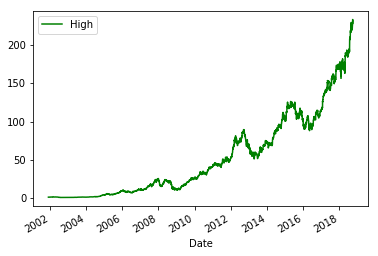

In [7]:
import matplotlib.pyplot as plt
equities_data['AAPL'].plot( kind='line', x = 'Date', y = 'High', color='green')
plt.show()

<b><u>What is 'Mean Reversion'?</u></b>

Mean reversion is financial theory suggesting that asset prices and returns eventually return back to the long-run mean or average of the entire dataset.

We will use both a 50-day and 200-day rolling average, which means we need to add those columns to our data. Handily - we don't need to learn any statistical math for this, Pandas comes with a mean() function and a rolling() method we can apply to any numerical Data Series:

In [11]:
equities_data[ 'AAPL' ][ '50_day_average' ] = equities_data[ 'AAPL' ].High.rolling(window=50, axis='rows').mean()
equities_data[ 'AAPL' ][47:60]

,Date,Open,High,Low,Adj. Close,Volume,50_day_average
4224,2002-02-06,1.62,1.64,1.53,1.56,149409400.0,NaN
4223,2002-02-07,1.56,1.60,1.52,1.54,86961000.0,NaN
4222,2002-02-08,1.55,1.56,1.48,1.52,88832800.0,1.4452
4221,2002-02-11,1.51,1.58,1.50,1.58,99653400.0,1.4500
4220,2002-02-12,1.56,1.59,1.55,1.56,56084000.0,1.4556
4219,2002-02-13,1.57,1.60,1.56,1.58,78248800.0,1.4604
4218,2002-02-14,1.59,1.60,1.54,1.56,65042600.0,1.4654
4217,2002-02-15,1.55,1.58,1.51,1.51,65049600.0,1.4684
4216,2002-02-19,1.5,1.51,1.42,1.43,97561800.0,1.4682
4215,2002-02-20,1.44,1.47,1.41,1.46,71360800.0,1.4678


Let's add the 200 day mean too, and plot them from 2004 to end of 2012:

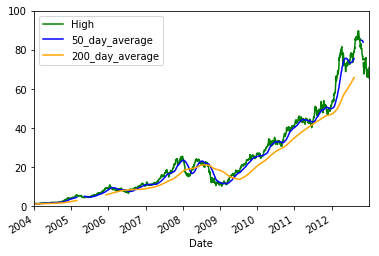

In [17]:
equities_data[ 'AAPL' ][ '200_day_average' ] = equities_data[ 'AAPL' ].High.rolling(window=200, axis='rows').mean()
ax = plt.gca() # Get current axis
equities_data['AAPL'].plot( kind='line', x = 'Date', y = 'High',            color = 'green',  ax = ax )
equities_data['AAPL'].plot( kind='line', x = 'Date', y = '50_day_average',  color = 'blue',   ax = ax )
equities_data['AAPL'].plot( kind='line', x = 'Date', y = '200_day_average', color = 'orange', ax = ax )
ax.set_xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2012-12-31'))
ax.set_ylim(0,100)
plt.show()

So what does this actually tell us? Well, in the simplest terms, it means we can suggest that when our rolling average is above our price line, we should be buying stock in Apple, and when it's below we should be short-selling. Let's zoom in on 2007-2008 (launch of the iPhone) as a good example of how this works:

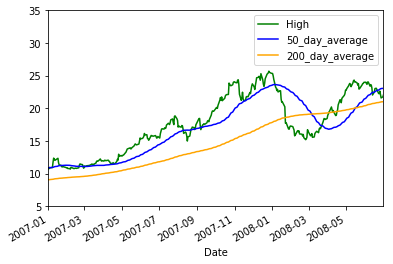

In [22]:
ax=plt.gca()
equities_data['AAPL'].plot( kind='line', x = 'Date', y = 'High',            color = 'green',  ax = ax )
equities_data['AAPL'].plot( kind='line', x = 'Date', y = '50_day_average',  color = 'blue',   ax = ax )
equities_data['AAPL'].plot( kind='line', x = 'Date', y = '200_day_average', color = 'orange', ax = ax )
ax.set_xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2008-06-30'))
ax.set_ylim(5,35)
plt.show()

In the example - the 200 day moving average is telling us all the way through 2007 that we should be betting against Apple - taking a short position and holding it, despite the company looking very sucessful. However in Q1 2008 stock tumbles and crosses its line. At which point we'd exit that short position and seeing as it falls below, we would switch to buying Apple as a good bet to recover. Lo and behold halfway through Q2 it crosses in the other direction, at which point we should again flatten our position, expecting it to 'revert to mean'.